In [1]:
%matplotlib inline
import gc
import util
import pdet
import fpfs
import fitsio
import pltutil
import numpy as np
import numpy.lib.recfunctions as rfn
import matplotlib.pylab as plt

ver='try2'
gver='basic1'
wrkDir=os.environ['homeWrk']
simDir=os.path.join(wrkDir,'FPFS2/sim/')

In [2]:
# read noiseless data
outNN1=[]
outNN2=[]
for _i in range(100):
    _a1=fitsio.read(os.path.join(simDir,'src_%sCenter-var0em0_%s/psf60/fpfs-cut16-%04d-g1-0000.fits' %(gver,ver,_i)))
    _a2=fitsio.read(os.path.join(simDir,'src_%sCenter-var0em0_%s/psf60/fpfs-cut16-%04d-g1-2222.fits' %(gver,ver,_i)))
    outNN1.append(_a1)
    outNN2.append(_a2)
    del _a1,_a2
outNN1 =   rfn.stack_arrays(outNN1,usemask=False)
outNN2 =   rfn.stack_arrays(outNN2,usemask=False)
outDNN1=   pdet.peak2det(outNN1)
outDNN2=   pdet.peak2det(outNN2)

In [3]:
Const  =   2000.
outENN1=   fpfs.fpfsBase.fpfsM2E(outNN1,dets=outDNN1,const=Const,noirev=False)
outENN2=   fpfs.fpfsBase.fpfsM2E(outNN2,dets=outDNN2,const=Const,noirev=False)
del outNN1,outNN2
gc.collect()

6

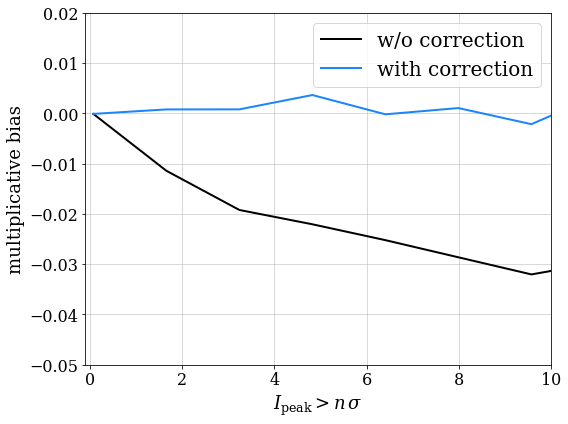

In [4]:
# test for noiseless case
tt = (2,2)
x=[]
y1=[]
y2=[]
pn='v%d%d' %tt

plt.close()
fig,axes=pltutil.make_figure_axes(1,1)
ax=axes[0]
    
if tt != (2,2):
    xlabel=r'$I_{\rm peak}-I_{\Delta %d%d}$' %(tt[0]-2,tt[1]-2)
    ax.set_xlim(-0.1,2)
    dcc=0.0005
    dcut=0.01
else:
    xlabel=r'$I_{\rm peak}$'
    ax.set_xlim(-0.1,10)
    dcc=0.005
    dcut=0.1
    
for i in range(0,10):
    cut=dcut*i+0.005
    
    msk1 = (outDNN1['pdet_%s' %pn]>cut)
    ellM1= outENN1[msk1]
    detM1= outDNN1[msk1]
    del msk1
    
    msk2 = (outDNN2['pdet_%s' %pn]>cut)
    ellM2= outENN2[msk2]
    detM2= outDNN2[msk2]
    del msk2
    
    cor1,cor1b = util.get_detbias(detM1,ellM1,cut,dcc,ind=tt)
    cor2,cor2b = util.get_detbias(detM2,ellM2,cut,dcc,ind=tt)
    cor1=(cor1+cor1b)/2.
    cor2=(cor2+cor2b)/2.
    de   = np.sum(ellM2['fpfs_e1'])-np.sum(ellM1['fpfs_e1'])
    rave = (np.sum(ellM2['fpfs_RE'])+np.sum(ellM1['fpfs_RE']))/2.
    raveR= (np.sum(ellM2['fpfs_RE'])+np.sum(ellM1['fpfs_RE'])+cor1+cor2)/2.
    x.append(cut/np.sqrt(4e-3))
    y1.append(de/rave/0.04-1)
    y2.append(de/raveR/0.04-1)
    del detM1,detM2,ellM1,ellM2
gc.collect()
ax.plot(np.array(x),np.array(y1),label='w/o correction',color=pltutil.colors[0])
ax.plot(np.array(x),np.array(y2),label='with correction',color=pltutil.colors[1])
ax.set_xlabel(xlabel+r'$>n\,\sigma$')
ax.set_ylabel('multiplicative bias')
ax.set_ylim(-0.05,0.02)
ax.grid()
ax.legend()
plt.tight_layout()
#fig.savefig('../../html/noisy_knownRef_%s.png' %pn)

apply cut on pdet_v32 at 0.005
278832
apply cut on pdet_v21 at 0.010
265664
apply cut on pdet_v23 at -0.020
265664
apply cut on pdet_v12 at -0.020
265664
apply cut on pdet_v32 at -0.002
265664
apply cut on pdet_v32 at 0.005
275688
apply cut on pdet_v21 at 0.010
262528
apply cut on pdet_v23 at -0.020
262528
apply cut on pdet_v12 at -0.020
262528
apply cut on pdet_v32 at -0.002
262528
apply cut on pdet_v32 at 0.015
176492
apply cut on pdet_v21 at 0.010
176296
apply cut on pdet_v23 at -0.020
176296
apply cut on pdet_v12 at -0.020
176296
apply cut on pdet_v32 at -0.002
176296
apply cut on pdet_v32 at 0.015
178640
apply cut on pdet_v21 at 0.010
178356
apply cut on pdet_v23 at -0.020
178356
apply cut on pdet_v12 at -0.020
178356
apply cut on pdet_v32 at -0.002
178356
apply cut on pdet_v32 at 0.025
103364
apply cut on pdet_v21 at 0.010
103364
apply cut on pdet_v23 at -0.020
103364
apply cut on pdet_v12 at -0.020
103364
apply cut on pdet_v32 at -0.002
103364
apply cut on pdet_v32 at 0.025
1051

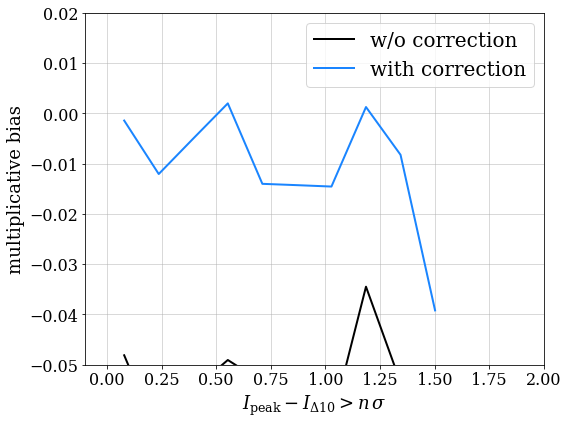

In [76]:
# test for noiseless case
x=[]
y1=[]
y2=[]


plt.close()
fig,axes=pltutil.make_figure_axes(1,1)
ax=axes[0]
    
tt = (3,2)
if tt != (2,2):
    xlabel=r'$I_{\rm peak}-I_{\Delta %d%d}$' %(tt[0]-2,tt[1]-2)
    ax.set_xlim(-0.1,2)
    dcc=0.0005
    dcut=0.01
else:
    xlabel=r'$I_{\rm peak}$'
    ax.set_xlim(-0.1,10)
    dcc=0.005
    dcut=0.1
    
indsAll=[]
indsAll.append(tt)
indsAll.append((2,1))
indsAll.append((2,3))
indsAll.append((1,2))
indsAll.append((3,2))

dccAll=[]
dccAll.append(dcc)
dccAll.append(0.0005)
dccAll.append(0.0005)
dccAll.append(0.0005)
dccAll.append(0.0005)

    
for i in range(0,10):
    cut=dcut*i+0.005
    
    cutAll=[]
    cutAll.append(cut)
    cutAll.append(0.01)
    cutAll.append(-0.02)
    cutAll.append(-0.02)
    cutAll.append(-0.002)

    msk1 = np.ones(len(outDNN1)).astype(bool)
    for _ in range(len(cutAll)):
        pn='v%d%d' %indsAll[_]
        msk1=msk1&(outDNN1['pdet_%s' %pn]>cutAll[_])
    ellM1= outENN1[msk1]
    detM1= outDNN1[msk1]
    del msk1
    
    msk2 = np.ones(len(outDNN2)).astype(bool)
    for _ in range(len(cutAll)):
        pn='v%d%d' %indsAll[_]
        msk2=msk2&(outDNN2['pdet_%s' %pn]>cutAll[_])
    ellM2= outENN2[msk2]
    detM2= outDNN2[msk2]
    del msk2
    

    cor1,cor1b = util.get_detbias_list(detM1,ellM1,indsAll,cutAll,dccAll)
    cor2,cor2b = util.get_detbias_list(detM2,ellM2,indsAll,cutAll,dccAll)
    cor1=(cor1+cor1b)/2.
    cor2=(cor2+cor2b)/2.
    de   = np.sum(ellM2['fpfs_e1'])-np.sum(ellM1['fpfs_e1'])
    rave = (np.sum(ellM2['fpfs_RE'])+np.sum(ellM1['fpfs_RE']))/2.
    raveR= (np.sum(ellM2['fpfs_RE'])+np.sum(ellM1['fpfs_RE'])+cor1+cor2)/2.
    x.append(cut/np.sqrt(4e-3))
    y1.append(de/rave/0.04-1)
    y2.append(de/raveR/0.04-1)
    del detM1,detM2,ellM1,ellM2
gc.collect()
ax.plot(np.array(x),np.array(y1),label='w/o correction',color=pltutil.colors[0])
ax.plot(np.array(x),np.array(y2),label='with correction',color=pltutil.colors[1])
ax.set_xlabel(xlabel+r'$>n\,\sigma$')
ax.set_ylabel('multiplicative bias')
ax.set_ylim(-0.05,0.02)
ax.grid()
ax.legend()
plt.tight_layout()
#fig.savefig('../../html/noisy_knownRef_%s.png' %pn)

In [ ]:
# merge data from n fields
out1=[]
out2=[]
for _i in range(1000):
    _a1=fitsio.read(os.path.join(simDir,'src_%sCenter-var4em3_%s/psf60/fpfs-cut16-%04d-g1-0000.fits' %(gver,ver,_i)))
    _a2=fitsio.read(os.path.join(simDir,'src_%sCenter-var4em3_%s/psf60/fpfs-cut16-%04d-g1-2222.fits' %(gver,ver,_i)))
    out1.append(_a1)
    out2.append(_a2)
    del _a1,_a2

In [16]:
out1 =   rfn.stack_arrays(out1,usemask=False)
out2 =   rfn.stack_arrays(out2,usemask=False)

outD1=   pdet.peak2det(out1)
outD2=   pdet.peak2det(out2)
outE1=   fpfs.fpfsBase.fpfsM2E(out1,dets=outD1,const=Const,noirev=True)
outE2=   fpfs.fpfsBase.fpfsM2E(out2,dets=outD2,const=Const,noirev=True)

gc.collect()

910

apply cut on pdet_v22 at 0.005
1165319
apply cut on pdet_v21 at 0.020
1157712
apply cut on pdet_v23 at 0.020
1150768
apply cut on pdet_v12 at 0.020
1143426
apply cut on pdet_v32 at 0.020
1136391
apply cut on pdet_v22 at 0.005
1165489
apply cut on pdet_v21 at 0.020
1156731
apply cut on pdet_v23 at 0.020
1148823
apply cut on pdet_v12 at 0.020
1142324
apply cut on pdet_v32 at 0.020
1136307
apply cut on pdet_v22 at 0.105
1165319
apply cut on pdet_v21 at 0.020
1157712
apply cut on pdet_v23 at 0.020
1150768
apply cut on pdet_v12 at 0.020
1143426
apply cut on pdet_v32 at 0.020
1136391
apply cut on pdet_v22 at 0.105
1165489
apply cut on pdet_v21 at 0.020
1156731
apply cut on pdet_v23 at 0.020
1148823
apply cut on pdet_v12 at 0.020
1142324
apply cut on pdet_v32 at 0.020
1136307
apply cut on pdet_v22 at 0.205
1165319
apply cut on pdet_v21 at 0.020
1157712
apply cut on pdet_v23 at 0.020
1150768
apply cut on pdet_v12 at 0.020
1143426
apply cut on pdet_v32 at 0.020
1136391
apply cut on pdet_v22 at 

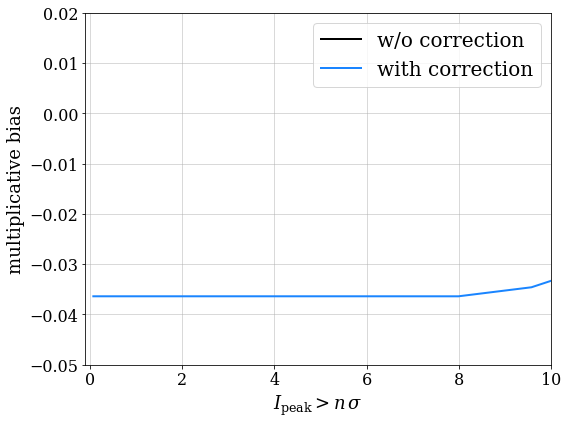

In [93]:
# test for noiseless case
x=[]
y1=[]
y2=[]


plt.close()
fig,axes=pltutil.make_figure_axes(1,1)
ax=axes[0]
    
tt = (2,2)
if tt != (2,2):
    xlabel=r'$I_{\rm peak}-I_{\Delta %d%d}$' %(tt[0]-2,tt[1]-2)
    ax.set_xlim(-0.1,2)
    dcc=0.0005
    dcut=0.01
else:
    xlabel=r'$I_{\rm peak}$'
    ax.set_xlim(-0.1,10)
    dcc=0.005
    dcut=0.1
    
indsAll=[]
indsAll.append(tt)
indsAll.append((2,1))
indsAll.append((2,3))
indsAll.append((1,2))
indsAll.append((3,2))

dccAll=[]
dccAll.append(dcc)
dccAll.append(0.0005)
dccAll.append(0.0005)
dccAll.append(0.0005)
dccAll.append(0.0005)

    
for i in range(0,10):
    cut=dcut*i+0.005
    
    cutAll=[]
    cutAll.append(cut)
    cutAll.append(0.02)
    cutAll.append(0.02)
    cutAll.append(0.02)
    cutAll.append(0.02)

    msk1 = np.ones(len(outD1)).astype(bool)
    for _ in range(len(cutAll)):
        pn='v%d%d' %indsAll[_]
        msk1=msk1&(outD1['pdet_%s' %pn]>cutAll[_])
    ellM1= outE1[msk1]
    detM1= outD1[msk1]
    del msk1
    
    msk2 = np.ones(len(outD2)).astype(bool)
    for _ in range(len(cutAll)):
        pn='v%d%d' %indsAll[_]
        msk2=msk2&(outD2['pdet_%s' %pn]>cutAll[_])
    ellM2= outE2[msk2]
    detM2= outD2[msk2]
    del msk2
    

    cor1,cor1b = util.get_detbias_list(detM1,ellM1,indsAll,cutAll,dccAll)
    cor2,cor2b = util.get_detbias_list(detM2,ellM2,indsAll,cutAll,dccAll)
    cor1=(cor1+cor1b)/2.
    cor2=(cor2+cor2b)/2.
    de   = np.sum(ellM2['fpfs_e1'])-np.sum(ellM1['fpfs_e1'])
    rave = (np.sum(ellM2['fpfs_RE'])+np.sum(ellM1['fpfs_RE']))/2.
    raveR= (np.sum(ellM2['fpfs_RE'])+np.sum(ellM1['fpfs_RE'])+cor1+cor2)/2.
    x.append(cut/np.sqrt(4e-3))
    y1.append(de/rave/0.04-1)
    y2.append(de/raveR/0.04-1)
    del detM1,detM2,ellM1,ellM2
gc.collect()
ax.plot(np.array(x),np.array(y1),label='w/o correction',color=pltutil.colors[0])
ax.plot(np.array(x),np.array(y2),label='with correction',color=pltutil.colors[1])
ax.set_xlabel(xlabel+r'$>n\,\sigma$')
ax.set_ylabel('multiplicative bias')
ax.set_ylim(-0.05,0.02)
ax.grid()
ax.legend()
plt.tight_layout()
#fig.savefig('../../html/noisy_knownRef_%s.png' %pn)

In [17]:
dcc=0.005
x=[]
y1=[]
y2=[]

xlabel=r'$s_0$'
for i in range(0,8):
    cut=0.1*i
    
    msk1 = (outE1['fpfs_s0']>cut)
    ellM1= outE1[msk1]
    del msk1
    
    msk2 = (outE2['fpfs_s0']>cut)
    ellM2= outE2[msk2]
    del msk2
    
    cor1 = get_selbias(ellM1,cut,dcc)[0]
    cor2 = get_selbias(ellM2,cut,dcc)[0]
    de   = np.sum(ellM2['fpfs_e1'])-np.sum(ellM1['fpfs_e1'])
    rave = (np.sum(ellM2['fpfs_RE'])+np.sum(ellM1['fpfs_RE']))/2.
    raveR= (np.sum(ellM2['fpfs_RE'])+np.sum(ellM1['fpfs_RE'])+cor1+cor2)/2.
    x.append(cut)
    y1.append(de/rave/0.04-1)
    y2.append(de/raveR/0.04-1)
    del ellM1,ellM2
gc.collect()

plt.close()
fig,axes=pltutil.make_figure_axes(1,1)
ax=axes[0]
ax.plot(np.array(x),np.array(y1),label='w/o correction',color=pltutil.colors[0])
ax.plot(np.array(x),np.array(y2),label='with correction',color=pltutil.colors[1])
ax.set_xlabel(xlabel+' lower limit')
ax.set_ylabel('multiplicative bias')
ax.set_ylim(-0.01,0.01)
ax.grid()
ax.legend()
plt.tight_layout()
#fig.savefig('../../html/noisy_knownRef_%s.png' %pn)

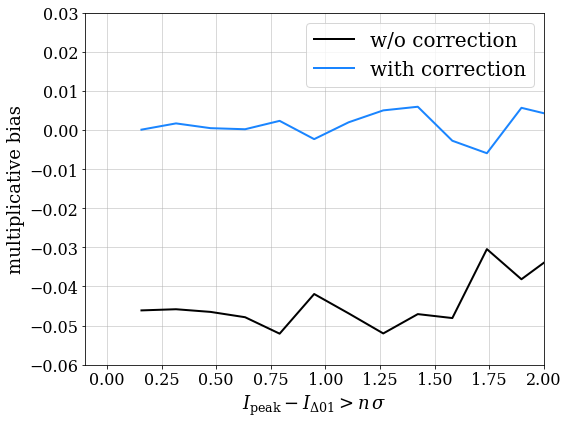

In [22]:
x=[]
y1=[]
y2=[]
tt=(2,3)
pn='v%d%d' %tt
cuts=-10.00

plt.close()
fig,axes=pltutil.make_figure_axes(1,1)
ax=axes[0]

if tt != (2,2):
    xlabel=r'$I_{\rm peak}-I_{\Delta %d%d}$' %(tt[0]-2,tt[1]-2)
    ax.set_xlim(-0.1,2)
    dcc=0.0005
    dcut=0.01
else:
    xlabel=r'$I_{\rm peak}$'
    ax.set_xlim(-0.1,10)
    dcc=0.005
    dcut=0.1
    
for i in range(0,20):
    cut=dcut*i+0.01
    
    msk1 = (outD1['pdet_%s' %pn]>cut)&(outE1['fpfs_s0']>cuts)
    ellM1= outE1[msk1]
    detM1= outD1[msk1]
    del msk1
    
    msk2 = (outD2['pdet_%s' %pn]>cut)&(outE2['fpfs_s0']>cuts)
    ellM2= outE2[msk2]
    detM2= outD2[msk2]
    del msk2
    
    cor1 = get_detbias_all(detM1,ellM1,cut,cuts,dcc,ind=tt)[0]
    cor2 = get_detbias_all(detM2,ellM2,cut,cuts,dcc,ind=tt)[0]
    de   = np.sum(ellM2['fpfs_e1'])-np.sum(ellM1['fpfs_e1'])
    rave = (np.sum(ellM2['fpfs_RE'])+np.sum(ellM1['fpfs_RE']))/2.
    raveR= (np.sum(ellM2['fpfs_RE'])+np.sum(ellM1['fpfs_RE'])+cor1+cor2)/2.
    x.append(cut/np.sqrt(4e-3))
    y1.append(de/rave/0.04-1)
    y2.append(de/raveR/0.04-1)
    del detM1,ellM2,detM2
gc.collect()
ax.plot(np.array(x),np.array(y1),label='w/o correction',color=pltutil.colors[0])
ax.plot(np.array(x),np.array(y2),label='with correction',color=pltutil.colors[1])
ax.set_xlabel(xlabel+r'$>n\,\sigma$')
ax.set_ylabel('multiplicative bias')
ax.set_ylim(-0.06,0.03)
ax.grid()
ax.legend()
plt.tight_layout()
#fig.savefig('../../html/noisy_knownRef_%s.png' %pn)

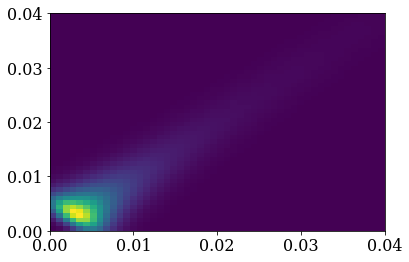

In [28]:
_=plt.hist2d(outD1['pdet_v23'],outD1['pdet_v21'],range=[[0,0.04],[0,0.04]],bins=50)

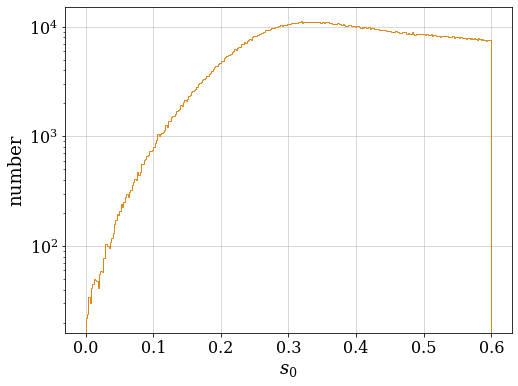

In [12]:
plt.close()
fig,axes=pltutil.make_figure_axes(1,1)
ax=axes[0]
ax.hist(outE1['fpfs_s0'],range=(0,0.6),bins=300,color=pltutil.colors[-1],histtype='step')
ax.set_yscale('log')
ax.set_xlabel(r'$s_0$')
ax.set_ylabel('number')
ax.grid()

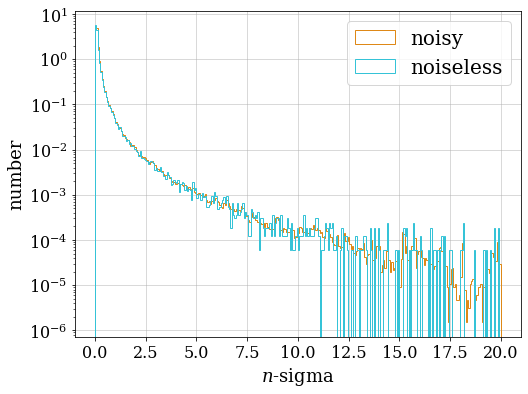

In [67]:
tt=(2,3)
if True:
    plt.close()
    fig,axes=pltutil.make_figure_axes(1,1)
    ax=axes[0]
    h1,g1,_=ax.hist(outD1['pdet_%s' %pn]/np.sqrt(4e-3),range=(0,20),bins=300,color=pltutil.colors[-1],histtype='step',label='noisy',density=True)
    h2,g2,_=ax.hist(outDNN1['pdet_%s' %pn]/np.sqrt(4e-3),range=(0,20),bins=300,color=pltutil.colors[-2],histtype='step',label='noiseless',density=True)
    ax.set_yscale('log')
    ax.set_xlabel(r'$n$-sigma')
    ax.set_ylabel('number')
    ax.grid()
    ax.legend()

if False:
    plt.plot(g1[1:],(h2-h1)/h2)
    plt.xlim(1,10)

In [87]:
tt=(2,3)
msk=(outDNN1['pdet_v%d%d'%tt]>0.05)&(outDNN1['pdet_v%d%d'%tt]<0.055)
if True:
    plt.close()
    fig,axes=pltutil.make_figure_axes(1,1)
    ax=axes[0]
    #h1,g1,_=ax.hist(outD1['fpfs_e1v%d%dr1'%tt],range=(0,1),bins=300,color=pltutil.colors[-1],histtype='step',label='noisy',density=True)
    h2,g2,_=ax.hist(outDNN1['pdet_v%d%dr1'%tt][msk],range=(-0.5,0.1),bins=300,color=pltutil.colors[-2],histtype='step',label='noiseless',density=True)
    ax.set_yscale('log')
    ax.set_xlabel(r'$n$-sigma')
    ax.set_ylabel('number')
    ax.grid()
    ax.legend()

if False:
    plt.plot(g1[1:],(h2-h1)/h2)
    plt.xlim(1,10)

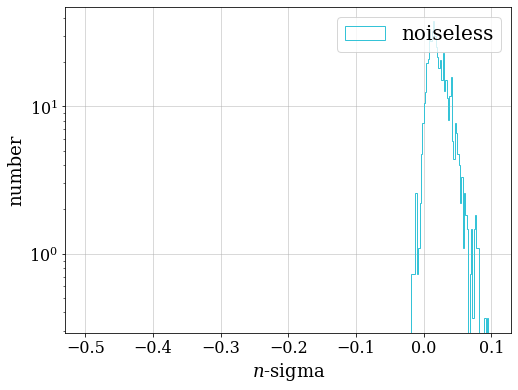

In [88]:
tt=(3,2)
msk=(outDNN1['pdet_v%d%d'%tt]>0.05)&(outDNN1['pdet_v%d%d'%tt]<0.055)
if True:
    plt.close()
    fig,axes=pltutil.make_figure_axes(1,1)
    ax=axes[0]
    #h1,g1,_=ax.hist(outD1['fpfs_e1v%d%dr1'%tt],range=(0,1),bins=300,color=pltutil.colors[-1],histtype='step',label='noisy',density=True)
    h2,g2,_=ax.hist(outDNN1['pdet_v%d%dr1'%tt][msk],range=(-0.5,0.1),bins=300,color=pltutil.colors[-2],histtype='step',label='noiseless',density=True)
    ax.set_yscale('log')
    ax.set_xlabel(r'$n$-sigma')
    ax.set_ylabel('number')
    ax.grid()
    ax.legend()

if False:
    plt.plot(g1[1:],(h2-h1)/h2)
    plt.xlim(1,10)

In [211]:
import scipy
import matplotlib.colors as mcolors
def plot_scalarhist_contours(data1,data2,ax,ranges=[[0.02,0.2],[-0.2,0.2]],cc='blue'):
    hist,xg,yg=np.histogram2d(data1,data2,range=ranges,bins=40)
    del data1,data2
    contour1=1-0.68; contour2=1-0.95
    def objective(limit, target):
        msk = np.where(hist>=limit)
        count = hist[msk]
        return count.sum() - target
    
    xc=(xg[1:]+xg[:-1])/2.
    yc=(yg[1:]+yg[:-1])/2.

    target1 = hist.sum()*(1-contour1)
    target2 = hist.sum()*(1-contour2)

    level1 = scipy.optimize.bisect(objective, hist.min(), hist.max(), args=(target1,))
    level2 = scipy.optimize.bisect(objective, hist.min(), hist.max(), args=(target2,))

    level0 = np.inf
    color2= mcolors.ColorConverter().to_rgb(cc)

    light = (color2[0], color2[1], color2[2], 0.6)
    dark = (color2[0], color2[1], color2[2], 0.2)
    ax.contourf(xc, yc, hist.T, [level2,level0],\
                colors=[light], alpha=0.3)
    ax.contourf(xc, yc, hist.T, [level1,level0],\
                colors=[dark], alpha=0.3)
    return

def plot_vectorave(data1,data2,ax,v1=None,v2=None,ranges=[[0.02,0.2],[-0.2,0.2]],cc='black'):
    if (v1 is None) and (v2 is None):
        raise ValueError('v1 and v2 cannot be all None')
    nfield,xg,yg=np.histogram2d(data1,data2,range=ranges,bins=20)
    xc=(xg[1:]+xg[:-1])/2.
    yc=(yg[1:]+yg[:-1])/2.
        
    if v1 is None:
        v1field=np.zeros((20,20))
    else:
        v1field,xg,yg=np.histogram2d(data1,data2,weights=v1,range=ranges,bins=20)
        v1field=np.divide(v1field,nfield,where=nfield>0)
        
    if v2 is None:
        v2field=np.zeros((20,20))
    else:
        v2field,xg,yg=np.histogram2d(data1,data2,weights=v2,range=ranges,bins=20)
        v2field=np.divide(v2field,nfield,where=nfield>0)
    del data1,data2
    ax.quiver(xc,yc,v1field.T,v2field.T)
    return v1field,v2field,yc,xc

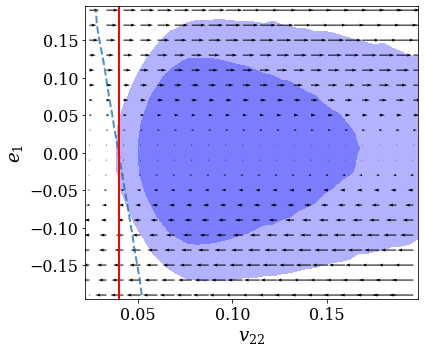

In [233]:
plt.close()
fig=plt.figure(figsize=(6,5))
ax=fig.add_subplot(1,1,1)
plot_scalarhist_contours(outD1['pdet_v22'],outE1['fpfs_e1'],ax)
v1f,v2f,yy,xx=plot_vectorave(outD1['pdet_v22'],outE1['fpfs_e1'],ax,v1=outD1['pdet_v22r1'])#,v2=outE1['fpfs_RE']*5.)

x=0.04+-1*np.ravel(v1f[(yy<0.04+0.01) & (yy > 0.04-1e-5),:])/2.
y=yy
ax.plot(x,xx,'--',alpha=0.8)

ax.set_xlabel('$v_{22}$')
ax.set_ylabel('$e_1$')
plt.axvline(x=0.04,color='red')
plt.tight_layout()

In [240]:
plt.close()
fig=plt.figure(figsize=(6,5))
ax=fig.add_subplot(1,1,1)
plot_scalarhist_contours(outD1['pdet_v22'],outE1['fpfs_s0'],ax,ranges=[[0.02,0.2],[0.1,0.6]])


ax.axvspan(0.05, 0.052, alpha=0.3, color='red')
ax.axhspan(0.15, 0.156, alpha=0.3, color='orange')
ax.set_xlabel(r'$v_{22}$')
ax.set_ylabel(r'$s_{0}$')

Text(0, 0.5, '$s_{0}$')

In [230]:
yy

array([0.0245, 0.0335, 0.0425, 0.0515, 0.0605, 0.0695, 0.0785, 0.0875,
       0.0965, 0.1055, 0.1145, 0.1235, 0.1325, 0.1415, 0.1505, 0.1595,
       0.1685, 0.1775, 0.1865, 0.1955])

In [231]:
xx

array([-0.19, -0.17, -0.15, -0.13, -0.11, -0.09, -0.07, -0.05, -0.03,
       -0.01,  0.01,  0.03,  0.05,  0.07,  0.09,  0.11,  0.13,  0.15,
        0.17,  0.19])

In [ ]:
gc.collect()

In [ ]:
outD1.dtype.names

('pdet_v12',
 'pdet_v21',
 'pdet_v22',
 'pdet_v23',
 'pdet_v32',
 'pdet_v12r1',
 'pdet_v21r1',
 'pdet_v22r1',
 'pdet_v23r1',
 'pdet_v32r1',
 'pdet_v12r2',
 'pdet_v21r2',
 'pdet_v22r2',
 'pdet_v23r2',
 'pdet_v32r2',
 'pdet_N00V12r1',
 'pdet_N00V12r2',
 'pdet_N22cV12r1',
 'pdet_N22sV12r2',
 'pdet_N00V21r1',
 'pdet_N00V21r2',
 'pdet_N22cV21r1',
 'pdet_N22sV21r2',
 'pdet_N00V22r1',
 'pdet_N00V22r2',
 'pdet_N22cV22r1',
 'pdet_N22sV22r2',
 'pdet_N00V23r1',
 'pdet_N00V23r2',
 'pdet_N22cV23r1',
 'pdet_N22sV23r2',
 'pdet_N00V32r1',
 'pdet_N00V32r2',
 'pdet_N22cV32r1',
 'pdet_N22sV32r2')